<a href="https://colab.research.google.com/github/iyakiwan/NPM-with-NN/blob/master/LearnNPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Penjelasan Dataset

Link dataset : https://drive.google.com/file/d/1-stKadfTgJLtYsHWqXhGO3nTjKVFxm_Q/view
```
Lisensi: https://creativecommons.org/licenses/by-sa/4.0/
versi: 1.0 (Agt 2018)


Penjelasan Label 
0: sms normal 
1: fraud atau penipuan 
2: promo

Catatan: 
Data dibersihkan dari  informasi pribadi. Nama diganti dengan "nama1"

Jumlah data: 1143
Jumlah per kelas:
0: 569
1: 335
2: 239

Cara mensitasi:
"Rahmi, F. and Wibisono, Y.  (2016). Aplikasi SMS Spam Filtering pada Android menggunakan Naive Bayes, Unpublished manuscript."

Menerima sumbangan data spam SMS, silakan kontak yudi@upi.edu
```

In [ ]:
#import libary pandas dan import file dataset(csv) ke libary pandas
import pandas as pd
df = pd.read_csv('dataset_sms_spam_v1.csv')
df

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0


In [ ]:
#Mengecek info dataset guna untuk preprossesing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [ ]:
#one-hot-encoding pada kolom label dan menggabungkan dengan data frame yang baru
category = pd.get_dummies(df.label)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='label')
#alasan saya rename karena nama kolom setelah di one-hot-encoding masih berupa int, sehingga tidak dapat di ambil nilai per kolomnya
df_baru.columns = ['pesan', 'normal', 'fraud', 'promo']
df_baru

,pesan,normal,fraud,promo
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,0,0,1
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,0,0,1
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",0,0,1
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",0,0,1
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,0,0,1
...,...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",1,0,0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,1,0,0
1140,Mba mau kirim 300 ya,1,0,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,1,0,0


In [ ]:
#membagi variabel atribut dan label dari dataframe
pesan = df_baru['pesan'].values
label = df_baru[['normal', 'fraud', 'promo']].values

In [ ]:
#membagi dataset menjadi train set dan validation set
from sklearn.model_selection import train_test_split
pesan_latih, pesan_test, label_latih, label_test = train_test_split(pesan, label, test_size=0.2, random_state=48)

In [ ]:
#proses tokenisasi dan squence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(pesan_latih) 
#tokenizer.fit_on_texts(pesan_test)
 
sekuens_latih = tokenizer.texts_to_sequences(pesan_latih)
sekuens_test = tokenizer.texts_to_sequences(pesan_test)
 
padded_latih = pad_sequences(sekuens_latih,  padding='post',maxlen=30,
                                      truncating='post') 
padded_test = pad_sequences(sekuens_test,  padding='post',maxlen=30,
                                      truncating='post')

In [ ]:
#pengecekan hasil sequence dan padding
print(sekuens_latih)
print(sekuens_test)
print(tokenizer.word_index)
print(padded_latih)
print(padded_test)

[[70, 26, 1693, 103, 225, 44, 314, 682, 2, 553, 269, 683, 844, 845, 74, 226, 18, 62, 19, 225, 463, 24, 270, 26, 2, 62, 75, 464], [684, 271, 2, 246, 1109, 50, 11, 684], [63, 1694, 315, 465, 1110, 1695, 112, 63, 175, 1696, 28, 272, 315, 146, 465, 176, 1111, 399, 113, 465, 685, 1697, 104], [46, 399, 71, 1698, 316, 1112, 123, 358, 1699, 17, 846, 1700, 1701], [273, 98, 1113, 359, 227, 147, 400, 317, 117, 228, 274, 103, 22, 79, 247, 53, 847, 20, 1702, 213, 1703, 848, 213, 1704, 275, 214], [3, 1114, 1115, 228, 1705, 1706, 1116, 1707, 1708, 1709, 114, 1117, 1710, 1711, 124, 165, 36, 686, 1712, 1713, 20, 1714, 1715, 1118, 1716, 1119, 1717, 466], [148, 183, 1718, 23, 849, 1120, 554, 17, 184, 1121, 248, 401, 1719, 17, 1121, 276, 401, 402, 1720, 277, 152, 555, 1721, 318, 1722], [1122, 80, 46, 103, 214, 153, 1723, 1724, 1725, 23, 850, 1726, 1727, 403, 1728, 1123, 1729, 1730], [28, 278, 279, 71, 402, 16, 47, 29, 1731, 3, 48, 38, 72, 13, 249, 250, 280, 131, 9, 687, 5, 20, 1732, 21, 6, 467, 29, 40, 8]

In [ ]:
#Membuat model sequential
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#menetukan loss function serta optimizer 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#membuat callback dari class myCallback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#pelatihan model dengan total eproch 20 dan 29 step
num_epochs = 20
history = model.fit(padded_latih, label_latih, epochs=num_epochs, callbacks=[callbacks], validation_data=(padded_test, label_test), verbose=2)
# history = model.fit(padded_latih, label_latih, epochs=num_epochs, validation_data=(padded_test, label_test), verbose=2)

Epoch 1/20
29/29 - 1s - loss: 0.9572 - accuracy: 0.4989 - val_loss: 0.6773 - val_accuracy: 0.4978
Epoch 2/20
29/29 - 1s - loss: 0.6379 - accuracy: 0.6630 - val_loss: 0.5631 - val_accuracy: 0.7511
Epoch 3/20
29/29 - 1s - loss: 0.4578 - accuracy: 0.7724 - val_loss: 0.4816 - val_accuracy: 0.7642
Epoch 4/20
29/29 - 1s - loss: 0.3966 - accuracy: 0.7724 - val_loss: 0.4223 - val_accuracy: 0.7598
Epoch 5/20
29/29 - 0s - loss: 0.3218 - accuracy: 0.7943 - val_loss: 0.3695 - val_accuracy: 0.7729
Epoch 6/20
29/29 - 0s - loss: 0.2470 - accuracy: 0.8654 - val_loss: 0.2888 - val_accuracy: 0.8690
Epoch 7/20

Akurasi telah mencapai >90%!
29/29 - 0s - loss: 0.1748 - accuracy: 0.9453 - val_loss: 0.2850 - val_accuracy: 0.9039


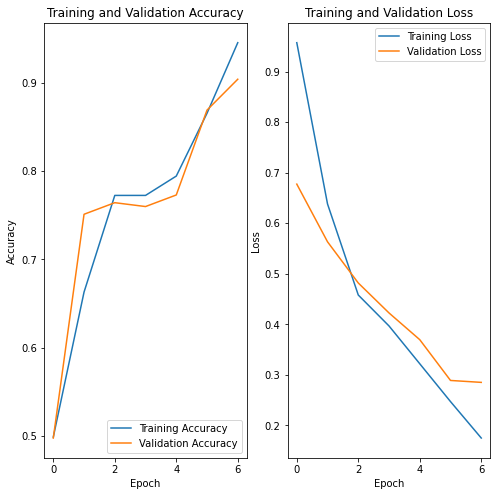

In [ ]:
#Melihat grafik dari actuasi train dan val serta lossnya menggunakan libary matplotlib.pyplot
import matplotlib.pyplot as plt
# epochs = model.nb_epoch
epochs = len(history.history['accuracy'])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()